In [24]:
import cv2
import numpy as np
import os

# Paths
image_folder = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\images"  # Replace with your dataset path
output_folder = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\masks"
os.makedirs(output_folder, exist_ok=True)

# ViBe parameters
num_samples = 20  # Number of background samples per pixel
radius = 25       # Reduced radius for better sensitivity
min_matches = 5   # Increased to 5 for stricter segmentation

# Initialize ViBe model
class ViBe:
    def __init__(self, image_shape):
        h, w = image_shape[:2]
        self.samples = np.zeros((h, w, num_samples), dtype=np.uint8)
        
    def initialize(self, image):
        for i in range(num_samples):
            self.samples[:, :, i] = np.roll(image, np.random.randint(-1, 2), axis=0)
            self.samples[:, :, i] = np.roll(self.samples[:, :, i], np.random.randint(-1, 2), axis=1)
    
    def update_and_segment(self, image):
        h, w = image.shape[:2]
        foreground_mask = np.zeros((h, w), dtype=np.uint8)
        match_count = np.zeros((h, w), dtype=np.uint8)
        
        for i in range(num_samples):
            diff = np.abs(image.astype(np.int16) - self.samples[:, :, i].astype(np.int16))
            match_count += (diff < radius).astype(np.uint8)
        
        foreground_mask[match_count < min_matches] = 255  # Fire regions
        
        # Update model
        rand_mask = np.random.randint(0, num_samples, (h, w))
        update_mask = (match_count >= min_matches)
        self.samples[update_mask, rand_mask[update_mask]] = image[update_mask]
        
        return foreground_mask

# Post-processing functions
def refine_mask(mask):
    kernel = np.ones((7, 7), np.uint8)  # Increased kernel size for better closing
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove noise
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Fill small gaps
    mask = cv2.medianBlur(mask, 5)  # Smooth the mask
    return mask

# Process images
vibe = None
for image_file in sorted(os.listdir(image_folder)):
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Skipping {image_file}, could not read file.")
        continue
    
    if vibe is None:
        vibe = ViBe(image.shape)
        vibe.initialize(image)
    
    mask = vibe.update_and_segment(image)
    mask = refine_mask(mask)  # Apply post-processing
    
    # Save mask
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, mask)
    print(f"Processed {image_file}")

print("ViBe wildfire region extraction complete with improved refinement!")


Processed fire-1005-_png.rf.f751eb341bba6fde2a6479766589e88f.jpg
Processed fire-1006-_png.rf.f5da663be8a9ad60edc01cc67088363e.jpg
Processed fire-1034-_png.rf.44cb0121d60bded7de78c55b3760c31d.jpg
Processed fire-1040-_png.rf.6d1b00a7597c9f99b8618ac2a96c473d.jpg
Processed fire-106-_png.rf.cf5839e012afdb33068f751ed91ef75b.jpg
Processed fire-1065-_png.rf.18aed821a21a5d3b2d23b27c82d50ca3.jpg
Processed fire-1080-_png.rf.aaa0c3dc14cf3a5f706180b6454c7f9e.jpg
Processed fire-1081-_png.rf.3d245ff58fc6a8def44204fdefd135b3.jpg
Processed fire-1082-_png.rf.c389d964548909e7578129ab53b23e1d.jpg
Processed fire-1087-_png.rf.24dabdd6bbd09e7d86684a6e421cc4d0.jpg
Processed fire-1096-_png.rf.7d63a189b073ea9c2f0f656378478a99.jpg
Processed fire-1100-_png.rf.a16843db84835fc99704d1d73f8c2dcc.jpg
Processed fire-1103-_png.rf.c0becec475c4a61737a89b3e24c49175.jpg
Processed fire-1107-_png.rf.d847d025930260f08ce8f2a21b23f6d8.jpg
Processed fire-1113-_png.rf.e3e275abe98e8198bc9caab6a77ab27a.jpg
Processed fire-1156-_png.r

Processed fire-2264-_png.rf.765a8429e3ca02d6d101f1d658dc8c2d.jpg
Processed fire-2266-_png.rf.3b51d8038c824ab6d9226e46451fa8f9.jpg
Processed fire-2272-_png.rf.422cc2db81b70c0681ca376359af311c.jpg
Processed fire-2274-_png.rf.55c383202a9105629aedffeaca8da7d1.jpg
Processed fire-2277-_png.rf.d9d81b6fc0eaa65427f7fdd58bc22987.jpg
Processed fire-2279-_png.rf.aad64001a5f8b4ee93eb3d082cd45761.jpg
Processed fire-2284-_png.rf.b50c9e8a1839b59d95d36ebfbe90b4d8.jpg
Processed fire-2285-_png.rf.0e2aaf61262052ed27b757f6ecf2ba12.jpg
Processed fire-2303-_png.rf.e029d6073eadf3bf0a92faee18e1b50b.jpg
Processed fire-2310-_png.rf.20037d63216379bea9539c2bda18eca4.jpg
Processed fire-2314-_png.rf.0766e170caf662491a662a107eaa5f13.jpg
Processed fire-2324-_png.rf.b3335494faacdb69e02e7d63d5619bd7.jpg
Processed fire-2326-_png.rf.6c93c24a1c978508fadc7b04cdab78bb.jpg
Processed fire-2328-_png.rf.18a5688f809b5d0802beef9d15ea2123.jpg
Processed fire-2345-_png.rf.94c357a4897b8263f7867b61023f4878.jpg
Processed fire-2354-_png.

Processed fire-3532-_png.rf.905c5f74ca89a56a82980d74fca85020.jpg
Processed fire-3534-_png.rf.5039e228be060bdbf7791521e44246be.jpg
Processed fire-355-_png.rf.8ec5f76197914cc0821fa2e352db3c68.jpg
Processed fire-3550-_png.rf.fa377c4e3e8818c9350ba3d842eaa619.jpg
Processed fire-3554-_png.rf.15f663eff0de5afc306467bc801612f8.jpg
Processed fire-3557-_png.rf.460d8d761fe7024748e16df8302a78a2.jpg
Processed fire-3560-_png.rf.5789ee898578a42274dafe57d5e2b4b2.jpg
Processed fire-3570-_png.rf.e0f295e96254e5f1ad2703266a13c68e.jpg
Processed fire-3587-_png.rf.71bab464f8f0cfc47de359439bb9df02.jpg
Processed fire-3598-_png.rf.d55891bca2fa838ead87a6518206b636.jpg
Processed fire-3605-_png.rf.6f4fa8d3eeb079d731a9c4496cd02b4a.jpg
Processed fire-3622-_png.rf.e99b03c1e08623e3e19a2af38aa111ee.jpg
Processed fire-3633-_png.rf.b44471e98854dc192c5c84a2b91cf179.jpg
Processed fire-3638-_png.rf.d0e0dcb5fdc86bb7225a1b698089e1a5.jpg
Processed fire-3657-_png.rf.8d80e3b552dc0d7062704aaf9ed01ca9.jpg
Processed fire-3665-_png.r

Processed fire-486-_png.rf.434921673a1eea8a480d50b998ff0a95.jpg
Processed fire-4860-_png.rf.57c00789a20e7beab14c5f5f661c703c.jpg
Processed fire-4861-_png.rf.3d6aa6d476b629723a4d3f3f8dcab66e.jpg
Processed fire-4881-_png.rf.e16c84184b8c2fbcc2d84acd24c3077e.jpg
Processed fire-4884-_png.rf.a76d7116694fe3d2e1fc8295f986676e.jpg
Processed fire-4889-_png.rf.64f004e5a99261eab33cdef4d9e4d9bc.jpg
Processed fire-4893-_png.rf.e42d816dc38c3c196b035645223bcc90.jpg
Processed fire-4898-_png.rf.50e76c0802a6c42a0250c497567b1a9b.jpg
Processed fire-4907-_png.rf.365e6c94f3ae72b7c3879e6dce71bb0b.jpg
Processed fire-4912-_png.rf.8cae64a40e1fa88a77cc70aa684b2b7d.jpg
Processed fire-4924-_png.rf.ca8b6ade602b9c3bd5d13bbd6724036f.jpg
Processed fire-493-_png.rf.7609e99b8aad2fadf804b193295fa62f.jpg
Processed fire-4938-_png.rf.a22b4b057d5611be23eee5bc5ac85d8b.jpg
Processed fire-4943-_png.rf.6f6c40e4e790b11d526217c243b3cf23.jpg
Processed fire-4949-_png.rf.6ff559ca9127b915644fde0dfc41c448.jpg
Processed fire-4953-_png.rf

In [25]:
import cv2
import os
import xml.etree.ElementTree as ET

# Paths
annotation_folder = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\annotations"  # XML files
image_folder = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\images"
output_folder = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\O_boxes_with_ann"

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

# Process each annotation
for xml_file in os.listdir(annotation_folder):
    if not xml_file.endswith(".xml"):
        continue

    # Parse XML
    xml_path = os.path.join(annotation_folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Get corresponding image
    img_name = root.find("filename").text
    img_path = os.path.join(image_folder, img_name)

    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping {img_name} (not found)")
        continue

    # Read bounding boxes from XML
    for obj in root.findall("object"):
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # Draw bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)  # Green box

    # Save the image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, image)

    print(f"Processed {img_name}")

print("✅ All images processed!")


Processed fire-1005-_png.rf.f751eb341bba6fde2a6479766589e88f.jpg
Processed fire-1006-_png.rf.f5da663be8a9ad60edc01cc67088363e.jpg
Processed fire-1034-_png.rf.44cb0121d60bded7de78c55b3760c31d.jpg
Processed fire-1040-_png.rf.6d1b00a7597c9f99b8618ac2a96c473d.jpg
Processed fire-106-_png.rf.cf5839e012afdb33068f751ed91ef75b.jpg
Processed fire-1065-_png.rf.18aed821a21a5d3b2d23b27c82d50ca3.jpg
Processed fire-1080-_png.rf.aaa0c3dc14cf3a5f706180b6454c7f9e.jpg
Processed fire-1081-_png.rf.3d245ff58fc6a8def44204fdefd135b3.jpg
Processed fire-1082-_png.rf.c389d964548909e7578129ab53b23e1d.jpg
Processed fire-1087-_png.rf.24dabdd6bbd09e7d86684a6e421cc4d0.jpg
Processed fire-1096-_png.rf.7d63a189b073ea9c2f0f656378478a99.jpg
Processed fire-1100-_png.rf.a16843db84835fc99704d1d73f8c2dcc.jpg
Processed fire-1103-_png.rf.c0becec475c4a61737a89b3e24c49175.jpg
Processed fire-1107-_png.rf.d847d025930260f08ce8f2a21b23f6d8.jpg
Processed fire-1113-_png.rf.e3e275abe98e8198bc9caab6a77ab27a.jpg
Processed fire-1156-_png.r

Processed fire-2266-_png.rf.3b51d8038c824ab6d9226e46451fa8f9.jpg
Processed fire-2272-_png.rf.422cc2db81b70c0681ca376359af311c.jpg
Processed fire-2274-_png.rf.55c383202a9105629aedffeaca8da7d1.jpg
Processed fire-2277-_png.rf.d9d81b6fc0eaa65427f7fdd58bc22987.jpg
Processed fire-2279-_png.rf.aad64001a5f8b4ee93eb3d082cd45761.jpg
Processed fire-2284-_png.rf.b50c9e8a1839b59d95d36ebfbe90b4d8.jpg
Processed fire-2285-_png.rf.0e2aaf61262052ed27b757f6ecf2ba12.jpg
Processed fire-2303-_png.rf.e029d6073eadf3bf0a92faee18e1b50b.jpg
Processed fire-2310-_png.rf.20037d63216379bea9539c2bda18eca4.jpg
Processed fire-2314-_png.rf.0766e170caf662491a662a107eaa5f13.jpg
Processed fire-2324-_png.rf.b3335494faacdb69e02e7d63d5619bd7.jpg
Processed fire-2326-_png.rf.6c93c24a1c978508fadc7b04cdab78bb.jpg
Processed fire-2328-_png.rf.18a5688f809b5d0802beef9d15ea2123.jpg
Processed fire-2345-_png.rf.94c357a4897b8263f7867b61023f4878.jpg
Processed fire-2354-_png.rf.ef2c297b199c11be4b4b2a2ac86ce70c.jpg
Processed fire-2357-_png.

Processed fire-3550-_png.rf.fa377c4e3e8818c9350ba3d842eaa619.jpg
Processed fire-3554-_png.rf.15f663eff0de5afc306467bc801612f8.jpg
Processed fire-3557-_png.rf.460d8d761fe7024748e16df8302a78a2.jpg
Processed fire-3560-_png.rf.5789ee898578a42274dafe57d5e2b4b2.jpg
Processed fire-3570-_png.rf.e0f295e96254e5f1ad2703266a13c68e.jpg
Processed fire-3587-_png.rf.71bab464f8f0cfc47de359439bb9df02.jpg
Processed fire-3598-_png.rf.d55891bca2fa838ead87a6518206b636.jpg
Processed fire-3605-_png.rf.6f4fa8d3eeb079d731a9c4496cd02b4a.jpg
Processed fire-3622-_png.rf.e99b03c1e08623e3e19a2af38aa111ee.jpg
Processed fire-3633-_png.rf.b44471e98854dc192c5c84a2b91cf179.jpg
Processed fire-3638-_png.rf.d0e0dcb5fdc86bb7225a1b698089e1a5.jpg
Processed fire-3657-_png.rf.8d80e3b552dc0d7062704aaf9ed01ca9.jpg
Processed fire-3665-_png.rf.d832fb92bfdd5a801eae17deefad242f.jpg
Processed fire-3673-_png.rf.97e536458637d4dd9e640da922e3f1f7.jpg
Processed fire-3683-_png.rf.10da06472eb64a6826b2688d164c8bc7.jpg
Processed fire-3685-_png.

Processed fire-4884-_png.rf.a76d7116694fe3d2e1fc8295f986676e.jpg
Processed fire-4889-_png.rf.64f004e5a99261eab33cdef4d9e4d9bc.jpg
Processed fire-4893-_png.rf.e42d816dc38c3c196b035645223bcc90.jpg
Processed fire-4898-_png.rf.50e76c0802a6c42a0250c497567b1a9b.jpg
Processed fire-4907-_png.rf.365e6c94f3ae72b7c3879e6dce71bb0b.jpg
Processed fire-4912-_png.rf.8cae64a40e1fa88a77cc70aa684b2b7d.jpg
Processed fire-4924-_png.rf.ca8b6ade602b9c3bd5d13bbd6724036f.jpg
Processed fire-493-_png.rf.7609e99b8aad2fadf804b193295fa62f.jpg
Processed fire-4938-_png.rf.a22b4b057d5611be23eee5bc5ac85d8b.jpg
Processed fire-4943-_png.rf.6f6c40e4e790b11d526217c243b3cf23.jpg
Processed fire-4949-_png.rf.6ff559ca9127b915644fde0dfc41c448.jpg
Processed fire-4953-_png.rf.147c42591a1bbc3e3548a60baaa67ce8.jpg
Processed fire-4955-_png.rf.8b1519e38bdd4fbb61df9124266fbec4.jpg
Processed fire-4956-_png.rf.9f1a25a90a1d2603d66e7c6e671b95d7.jpg
Processed fire-4959-_png.rf.e6890d3c6e9f3c2a8db494d1bb497546.jpg
Processed fire-497-_png.rf

Total Pixels: 262144
Fire Pixels: 1848
Fire Percentage: 0.70%


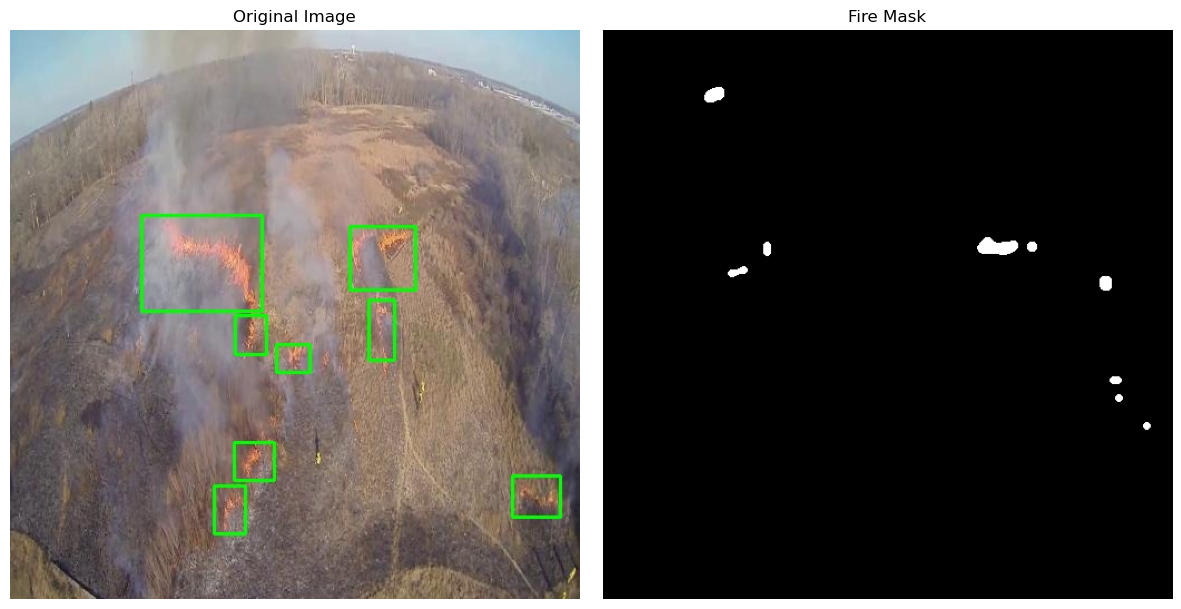

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_fire_percentage(image_path, mask_path):
    # Load the image and the fire mask
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper plotting
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    
    if image is None or mask is None:
        print("Error: Image or mask not found.")
        return
    
    total_pixels = mask.shape[0] * mask.shape[1]
    fire_pixels = np.count_nonzero(mask)
    fire_percentage = (fire_pixels / total_pixels) * 100
    
    print(f"Total Pixels: {total_pixels}")
    print(f"Fire Pixels: {fire_pixels}")
    print(f"Fire Percentage: {fire_percentage:.2f}%")
    
    # Plot original image and mask with proper aspect ratio
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(mask, cmap='gray')  # Use 'gray' for better visualization
    ax[1].set_title("Fire Mask")
    ax[1].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    return fire_percentage


# Example usage
image_path = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\O_boxes_with_ann\fire-4499-_png.rf.35ede70994b5f6c3c9d2c727aabd517a.jpg"
mask_path = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\masks\fire-4499-_png.rf.35ede70994b5f6c3c9d2c727aabd517a.jpg"
fire_percentage = calculate_fire_percentage(image_path, mask_path)


In [23]:
import os
from twilio.rest import Client

ACCOUNT_SID = "ACd7a8b1a8b939d3284349348038e20e32"
AUTH_TOKEN = "01e228d05b50d60e1e742f94c3751996"
TWILIO_PHONE_NUMBER = "++15513687447"
TO_PHONE_NUMBER = "+917013749949"  # Replace with the recipient's phone number

# Publicly accessible image URL
image_url = "https://drive.google.com/uc?export=view&id=1JGYWBJq3PHvx11Wqkzs0pWAn_4HZocNi",

# Fire percentage (Replace this with your actual calculation)
fire_percentage = 0.70 # Example value

# Construct the alert message
alert_message = f"🔥 Wildfire detected! Fire covers {fire_percentage:.2f}% of the image. Immediate action required!Check the fire location in the image."

# Initialize Twilio client
client = Client(ACCOUNT_SID, AUTH_TOKEN)

# Send MMS with Image
message = client.messages.create(
    body=alert_message,
    from_=TWILIO_PHONE_NUMBER,
    to=TO_PHONE_NUMBER,
    media_url=[image_url]  # Attach the image URL
)

print(f"✅Alert sent successfully! Message SID: {message.sid}")


✅Alert sent successfully! Message SID: MMa3c6ed859f1f41440609fe4345d57c5b


Total Pixels: 262144
Fire Pixels: 136138
Fire Percentage: 51.93%


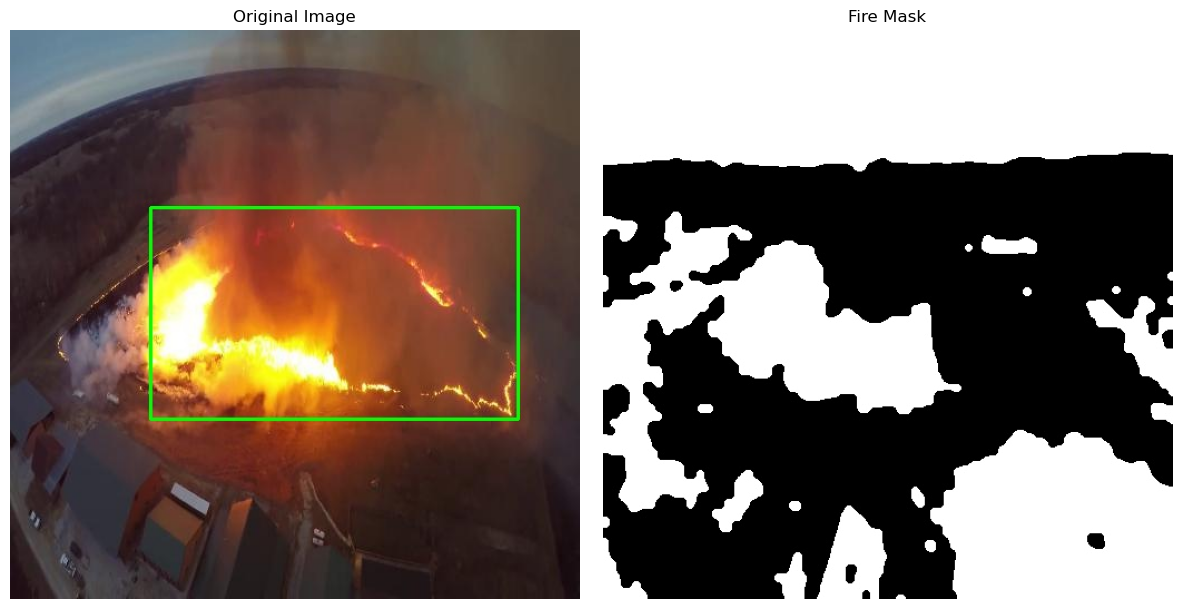

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_fire_percentage(image_path, mask_path):
    # Load the image and the fire mask
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper plotting
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    
    if image is None or mask is None:
        print("Error: Image or mask not found.")
        return
    
    total_pixels = mask.shape[0] * mask.shape[1]
    fire_pixels = np.count_nonzero(mask)
    fire_percentage = (fire_pixels / total_pixels) * 100
    
    print(f"Total Pixels: {total_pixels}")
    print(f"Fire Pixels: {fire_pixels}")
    print(f"Fire Percentage: {fire_percentage:.2f}%")
    
    # Plot original image and mask with proper aspect ratio
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(mask, cmap='gray')  # Use 'gray' for better visualization
    ax[1].set_title("Fire Mask")
    ax[1].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    return fire_percentage


# Example usage
image_path = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\O_boxes_with_ann\fire-2174-_png.rf.c37e05defc2a0981f156bc86eeb36655.jpg" 
mask_path = r"C:\Users\Yashuu\Downloads\WFD(MAIN)\Detection\Test\masks\fire-2174-_png.rf.c37e05defc2a0981f156bc86eeb36655.jpg"
fire_percentage = calculate_fire_percentage(image_path, mask_path)


In [5]:
import os
from twilio.rest import Client

ACCOUNT_SID = "ACd7a8b1a8b939d3284349348038e20e32"
AUTH_TOKEN = "01e228d05b50d60e1e742f94c3751996"
TWILIO_PHONE_NUMBER = "++15513687447"
TO_PHONE_NUMBER = "+917013749949"  # Replace with the recipient's phone number

# Publicly accessible image URL
image_url = "https://drive.google.com/uc?export=download&id=1IPb3fOpS9ctfr2KORIbyvhHHv_TYVAdN",

# Fire percentage (Replace this with your actual calculation)
fire_percentage = 51.93 # Example value

# Construct the alert message
alert_message = f"🔥 Wildfire detected! Fire covers {fire_percentage:.2f}% of the image. Immediate action required!Check the fire location in the image."

# Initialize Twilio client
client = Client(ACCOUNT_SID, AUTH_TOKEN)

# Send MMS with Image
message = client.messages.create(
    body=alert_message,
    from_=TWILIO_PHONE_NUMBER,
    to=TO_PHONE_NUMBER,
    media_url=[image_url]  # Attach the image URL
)

print(f"✅Alert sent successfully! Message SID: {message.sid}")


✅Alert sent successfully! Message SID: MMa46f43a0b6bff3f30220d33019cf80ca
